### Python Notes

#### Notes Prepared by Mohan Nayak
###### You can follow me on linkedin https://www.linkedin.com/in/mohan-nayak-49954392?lipi=urn%3Ali%3Apage%3Ad_flagship3_profile_view_base_contact_details%3BQ6mx07N%2FTOqTI9Op6fyvWA%3D%3D

This article discusses some more and a bit advanced methods available in NumPy.

1 **Stacking:** Several arrays can be stacked together along different axes.

 * **np.vstack:** To stack arrays along vertical axis.
 * **np.hstack:** To stack arrays along horizontal axis.
 * **np.column_stack:** To stack 1-D arrays as columns into 2-D arrays.
 * **np.concatenate:** To stack arrays along specified axis (axis is passed as argument).
 


In [1]:
import numpy as np

a = np.array([[1, 2],
             [3, 4]])

b = np.array([[5, 6],
             [7, 8]])

# vertical stacking
print("vertical stacking:\n", np.vstack((a, b)))

# Horizontal stacking 
print("\Horizontal stacking:\n", np.hstack((a, b)))

c = [5, 6]

# stacking columns
print("\nColumn stacking:\n", np.column_stack((a, c)))

# concatenation method 
print("\nConcatenating to 2nd axis:\n", np.concatenate((a, b), 1))




vertical stacking:
 [[1 2]
 [3 4]
 [5 6]
 [7 8]]
\Horizontal stacking:
 [[1 2 5 6]
 [3 4 7 8]]

Column stacking:
 [[1 2 5]
 [3 4 6]]

Concatenating to 2nd axis:
 [[1 2 5 6]
 [3 4 7 8]]


2.**Splitting:** For splitting, we have these functions:

 * **np.hsplit:** Split array along horizontal axis.
 * **np.vsplit:** Split array along vertical axis.
 * **np.array_split:** Split array along specified axis.

In [2]:
import numpy as np

a = np.array([[1, 3, 5, 7, 9, 11],
            [2, 4, 6, 8, 10, 12]])

# horizontal splitting
print("Splitting along horizontal axis into 2 parts:\n", np.hsplit(a, 2))

# vertical splitting
print("\nSplitting along vertical axis into 2 parts:\n", np.vsplit(a, 2))


Splitting along horizontal axis into 2 parts:
 [array([[1, 3, 5],
       [2, 4, 6]]), array([[ 7,  9, 11],
       [ 8, 10, 12]])]

Splitting along vertical axis into 2 parts:
 [array([[ 1,  3,  5,  7,  9, 11]]), array([[ 2,  4,  6,  8, 10, 12]])]


2.**Broadcasting:** The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes.
Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python. It does this without making needless copies of data and usually leads to efficient algorithm implementations. There are also cases where broadcasting is a bad idea because it leads to inefficient use of memory that slows computation.

NumPy operations are usually done element-by-element which requires two arrays to have exactly the same shape. Numpy’s broadcasting rule relaxes this constraint when the arrays’ shapes meet certain constraints.

**The Broadcasting Rule:** In order to broadcast, the size of the trailing axes for both arrays in an operation must either be the same size or one of them must be one.

We can think of the scalar b being stretched during the arithmetic operation into an array with the same shape as a. The new elements in b, as shown in above figure, are simply copies of the original scalar. Although, the stretching analogy is only conceptual.

Numpy is smart enough to use the original scalar value without actually making copies so that broadcasting operations are as memory and computationally efficient as possible. Because Example 1 moves less memory, (b is a scalar, not an array) around during the multiplication, it is about 10% faster than Example 2 using the standard numpy on Windows 2000 with one million element arrays!

The figure below makes the concept more clear:

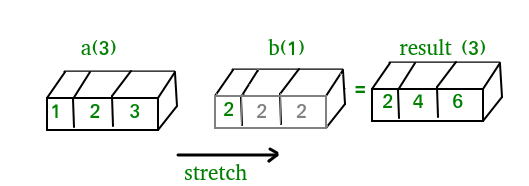

In above example, the scalar b is stretched to become an array of with the same shape as a so the shapes are compatible for element-by-element multiplication.

Now, let us see an example where both arrays get stretched.

In [3]:
import numpy as np

a = np.array([0.0, 10.0, 20.0, 30.0])
b = np.array([0.0, 1.0, 2.0])

print(a[:, np.newaxis]+b)

[[ 0.  1.  2.]
 [10. 11. 12.]
 [20. 21. 22.]
 [30. 31. 32.]]


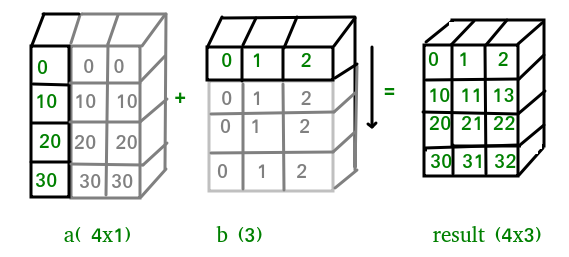

In some cases, broadcasting stretches both arrays to form an output array larger than either of the initial arrays.

4. **Working with datetime:** Numpy has core array data types which natively support datetime functionality. The data type is called “datetime64”, so named because “datetime” is already taken by the datetime library included in Python.

Consider the example below for some examples:

In [4]:
# creating a date

import numpy as np
today = np.datetime64('2023-02-27')
print("Date is:", today)
print("Year is:", np.datetime64(today, 'Y'))

# creating array of dates in a month

dates = np.arange('2023-02', '2023-03',dtype='datetime64[D]')
print("nDates of February, 2023:\n", dates)
print("Today is February:", today in dates)


# arithmetic operation on dates
dur = np.datetime64('2023-05-22') - np.datetime64('2022-05-22')
print("\nNo. of days:", dur)
print("No. of weeks:", np.timedelta64(dur, 'W'))

# sorting dates
a = np.array(['2023-02-12', '2022-10-13', '2024-05-22'], dtype='datetime64')
print("\nDates in sorted order:", np.sort(a))











Date is: 2023-02-27
Year is: 2023
nDates of February, 2023:
 ['2023-02-01' '2023-02-02' '2023-02-03' '2023-02-04' '2023-02-05'
 '2023-02-06' '2023-02-07' '2023-02-08' '2023-02-09' '2023-02-10'
 '2023-02-11' '2023-02-12' '2023-02-13' '2023-02-14' '2023-02-15'
 '2023-02-16' '2023-02-17' '2023-02-18' '2023-02-19' '2023-02-20'
 '2023-02-21' '2023-02-22' '2023-02-23' '2023-02-24' '2023-02-25'
 '2023-02-26' '2023-02-27' '2023-02-28']
Today is February: True

No. of days: 365 days
No. of weeks: 52 weeks

Dates in sorted order: ['2022-10-13' '2023-02-12' '2024-05-22']


5. **Linear algebra in NumPy:** The Linear Algebra module of NumPy offers various methods to apply linear algebra on any numpy array.
You can find:
 * rank, determinant, trace, etc. of an array.
 * eigen values of matrices
 * matrix and vector products (dot, inner, outer,etc. product), matrix exponentiation
 * solve linear or tensor equations and much more!
 
 Consider the example below which explains how we can use NumPy to do some matrix operations.

In [5]:
import numpy as np

A = np.array([[6, 1, 1],
             [4, -2, 5],
             [2, 8, 7]])

print("Rank of A:", np.linalg.matrix_rank(A))

print("\nTrace of A:", np.trace(A))

print("\nDeterminant of A:", np.linalg.det(A))

print("\nInverse of A:\n", np.linalg.inv(A))

print("\nMatrix A raised to power 3:\n", np.linalg.matrix_power(A, 3))


Rank of A: 3

Trace of A: 11

Determinant of A: -306.0

Inverse of A:
 [[ 0.17647059 -0.00326797 -0.02287582]
 [ 0.05882353 -0.13071895  0.08496732]
 [-0.11764706  0.1503268   0.05228758]]

Matrix A raised to power 3:
 [[336 162 228]
 [406 162 469]
 [698 702 905]]


In [6]:
import numpy as np

# coefficients
a = np.array([[1, 2], [3, 4]])
# constants
b = np.array([8, 18])

print("Solution of linear equations:", np.linalg.solve(a, b))


Solution of linear equations: [2. 3.]
